### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# CSS to show 2 tables side by side in section 5
CSS = """
div.cell:nth-child(75) .output {
    flex-direction: row;
}
div.cell:nth-child(77) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Table of contents
## 1. Reading the files
### -  Rating data information
### - Movie data information
### - User data information

## 2. Choosing the data
### - 2a Filtering out some columns from the users data
### - 2b Grouping ratings by the movie

## 3. Filtering the data
### - 3a Show users with a specific occupation
### - 3b Filtering out men above 40 years of age

## 4. Study the data
### - 4a Average age of authors
### - 4b Average rating per movie
### - 4c Top 10 movies with 40 or more ratings

## 5. Combined dataFrames
### - 5a Some insight into the different occupations
### - 5b Combine user and movie data
### - 5c The nicest and most harsh users


# 1. Read the files
This section is dedicated to reading the file contents and decribing the different data sets using head(), dtypes() and describe() and more. The 3 data sets are rating data, movie data and user data. 

These files are taken from 

http://files.grouplens.org/datasets/movielens/ml-100k.

rating_data = u.data

movie_data = u.item

user_data = u.user


Column names and such are then taken from the readme:

http://files.grouplens.org/datasets/movielens/ml-100k/README

Below we simply read in the data from the files provided from the above links


In [4]:
rating_data = pd.read_csv('u.data', sep='\t', header=None, names=['user id','item id','rating','timestamp'])
movie_header = ['movie id', 'movie title','release date','video release date',
              'IMDb URL','unknown','Action','Adventure','Animation',
              "Children's",'Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
              'Thriller','War','Western']
movie_data = pd.read_csv('u.item', sep='|', encoding='latin1', header=None, names=movie_header)
user_data = pd.read_csv('u.user', sep='|', header=None, names=['user id', 'age', 'gender', 'occupation', 'zip code'])

## Rating data information
Shows the head, dtypes and describes relevant columns in the rating data set

The rating data consists of 4 columns, user id, item id, rating and timestamp.

* timestamp is unix seconds from 1/1/1970 UTC
* ratings are a score from 1-5
* each user id occurs several times
* each movie id occurs several times



In [5]:
rating_data.head() # Rating dataset structure

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
rating_data.dtypes 

user id      int64
item id      int64
rating       int64
timestamp    int64
dtype: object

In [7]:
rating_data['rating'].describe() # Write out some statistics on the rating column

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
rating_data.groupby('rating').count() # Group by rating to check what the rating range is

,user id,item id,timestamp
rating,,,
1,6110,6110,6110
2,11370,11370,11370
3,27145,27145,27145
4,34174,34174,34174
5,21201,21201,21201


In [9]:
rating_data.sort_values('user id').head() # Each user can occur multiple times

,user id,item id,rating,timestamp
66567,1,55,5,875072688
62820,1,203,4,878542231
10207,1,183,5,875072262
9971,1,150,5,876892196
22496,1,68,4,875072688


In [10]:
 rating_data.sort_values('item id').head() # Each item can occur multiple times

,user id,item id,rating,timestamp
25741,84,1,2,883452108
93639,806,1,4,882385082
55726,768,1,5,883835025
49529,92,1,4,875810511
89079,419,1,4,879435590


## Movie data information
Shows the head, dtypes and describes relevant columns in the rating data set

The movie dataset lists each movie id and title with its release date, IMDb url as well as the genres it corresponds to.

* Each movie only occurs one time in this dataset
* A movie can have multiple genres


In [11]:
movie_data.head() # Movie dataset structure

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
movie_data.dtypes # Datatypes of movie dataset

movie id                int64
movie title            object
release date           object
video release date    float64
IMDb URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children's              int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [13]:
movie_data.sort_values('unknown', ascending=False).head() # Checking how many movies are an unknown genre

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1118,1119,Some Kind of Wonderful (1987),01-Jan-1987,NaN,http://us.imdb.com/M/title-exact?Some%20Kind%2...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1128,1129,Chungking Express (1994),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Chongqing%20S...,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [14]:
movie_genres = movie_header[5:]
movie_data[movie_genres].describe() # Describe all the genres in the movie dataset

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
movie_data.iloc[0] # We can also easily make use of iloc to find a specific movie

movie id                                                              1
movie title                                            Toy Story (1995)
release date                                                01-Jan-1995
video release date                                                  NaN
IMDb URL              http://us.imdb.com/M/title-exact?Toy%20Story%2...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             1
Children's                                                            1
Comedy                                                                1
Crime                                                                 0
Documentary                                                           0
Drama                                                           

## User data information

This section is dedicated to taking a look at the user_data dataset and build some general information on the data

Thios dataset has the columns user id, age, gender, offcupation, zipcode

* User id occurs only once
* None of the other fields contain a guaranteed unique value compared to other fields

In [16]:
user_data.head() # User data format

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
user_data.dtypes # User data data types

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [18]:
user_data.groupby('occupation').count()[['user id']] # See how many times each occupation occurs

,user id
occupation,
administrator,79
artist,28
doctor,7
educator,95
engineer,67
entertainment,18
executive,32
healthcare,16
homemaker,7


In [19]:
user_data.groupby('occupation')[user_data.columns[0]].describe()# See some statistics on each occupation

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,79.0,430.949367,281.302962,7.0,185.00,436.0,702.00,940.0
artist,28.0,451.892857,322.963860,23.0,149.00,421.5,823.75,920.0
doctor,7.0,533.714286,330.491913,138.0,275.00,427.0,843.00,935.0
educator,95.0,466.905263,250.727201,13.0,242.50,485.0,641.50,937.0
engineer,67.0,456.328358,261.663697,25.0,249.50,467.0,649.00,934.0
entertainment,18.0,398.000000,295.854098,16.0,153.50,381.0,537.25,926.0
executive,32.0,422.312500,287.533049,6.0,184.75,346.0,723.25,901.0
healthcare,16.0,501.437500,261.480393,60.0,343.25,563.5,688.50,910.0
homemaker,7.0,443.000000,345.112059,20.0,195.50,362.0,715.00,898.0


In [20]:
user_data.sort_values('user id') # Verify that a user doesn't occur more than once

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


**Since the user id is unique, we can use it as the index**

In [21]:
user_data_id_index = user_data.set_index('user id')
user_data_id_index.head(15)

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [22]:
user_data_id_index.iloc[0] # iloc still uses 0 index so in this case it isn't particularly useful to set_index

age                   24
gender                 M
occupation    technician
zip code           85711
Name: 1, dtype: object

# 2. Choosing the data

In this section we want to take a better look at the users and group up the movies according to ratings.

**2a:**
* Show only the gender, age and occupation columns in users

**2b:**
* Group ratings by the movie

## 2a Filtering out some columns from the users data

Here we select the specific columns we want from the dataset and simply print them out.

This is accomplished by simply inputting a list with the column names that you want into the dataframe.

In [23]:
user_data_id_index[['age','gender','occupation']]

,age,gender,occupation
user id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
6,42,M,executive
7,57,M,administrator
8,36,M,administrator
9,29,M,student


## 2b Grouping ratings by the movie

Here we will be sorting the ratings by the movie, to group together each movie. After that we will then convert the id to the title of the movie. The title is found from the movie_data dataset

**This dataFrame is used through multiple of the later parts.**

Here we first sort the data after which we make use of a lambda function. We simply pick our column to apply the lambda function in, and then we take that value and fetch the movie title. Since the ids start from 1, we simply need to get the iloc of x-1 to have the correct position of the movie title.

In [24]:
rating_data_id_to_title = rating_data.sort_values('item id') # Sort by the item_id
## Then replace each value with its corresponding title using apply
rating_data_id_to_title['item id'] = rating_data_id_to_title['item id'].apply(lambda x : movie_data.iloc[x-1]['movie title'])
rating_data_id_to_title

,user id,item id,rating,timestamp
25741,84,Toy Story (1995),2,883452108
93639,806,Toy Story (1995),4,882385082
55726,768,Toy Story (1995),5,883835025
49529,92,Toy Story (1995),4,875810511
89079,419,Toy Story (1995),4,879435590
80525,403,Toy Story (1995),4,879785974
14401,322,Toy Story (1995),2,887314119
99282,709,Toy Story (1995),4,879847730
35188,120,Toy Story (1995),4,889490412
29031,514,Toy Story (1995),5,875309276


# 3. Filtering the data

Here we will be doing two filters on the data

**3a**
* Show only users with a specific occupation, we will get a list of all the students

**3b**
* Show only users that are men above 40 years in age


## 3a Show users with a specific occupation

Here we filter out each user with a specific occupation. In this case it will be students. One way of filtering is the way done below.

In [25]:
print(user_data[user_data['occupation'] == 'student'].to_string())

     user id  age gender occupation zip code
8          9   29      M    student    01002
29        30    7      M    student    55436
31        32   28      F    student    78741
32        33   23      M    student    27510
35        36   19      F    student    93117
36        37   23      M    student    55105
48        49   23      F    student    76111
51        52   18      F    student    55105
65        66   23      M    student    80521
66        67   17      M    student    60402
67        68   19      M    student    22904
72        73   24      M    student    41850
75        76   20      M    student    02215
80        81   21      M    student    21218
93        94   26      M    student    71457
98        99   20      M    student    63129
100      101   15      M    student    05146
102      103   26      M    student    55108
103      104   27      M    student    55108
109      110   19      M    student    77840
116      117   20      M    student    16125
123      1

## 3b Filtering out men above 40 years of age

Here we apply 2 queries to the user_data, one which matches the gender and the other which checks if the persons age is 40 or above. We then sort the data so that the zipcodes are in ascending order.

With the sort we can potentially find out a trend on this age group of mens location



In [26]:
print(user_data[(user_data['gender'] == 'M') & (user_data['age'] > 39)].sort_values('zip code').to_string())

     user id  age gender     occupation zip code
766      767   70      M       engineer    00000
38        39   41      M  entertainment    01040
230      231   48      M      librarian    01080
297      298   44      M      executive    01581
425      426   55      M       educator    01602
925      926   49      M  entertainment    01701
328      329   48      M       educator    01720
207      208   43      M       engineer    01720
363      364   63      M       engineer    01810
776      777   63      M     programmer    01810
381      382   45      M       engineer    01824
90        91   55      M      marketing    01913
637      638   45      M       engineer    01940
311      312   48      M          other    02110
18        19   40      M      librarian    02138
324      325   48      M     technician    02139
419      420   53      M       educator    02140
847      848   46      M       engineer    02146
523      524   56      M       educator    02159
532      533   43   

# 4. Study the data

Here we will apply mathematical functions to make more sense of some sections of the datasets

**4a**

* Show the average age of authors

**4b**

* Use the earlier ratings per movie grouping to get the average per movie

**4c**

* Get the top 10 rated movies with more than 40 rates


## 4a Average age of authors

Here we filter out all the writers in the user_data.

We first filter out all the non-writers. We then use the mean() function to calculate the average age for us.

In [27]:
avg = user_data[user_data['occupation'] == 'writer']['age'].mean()
print('The average age of writers is {}.'.format(avg))

The average age of writers is 36.31111111111111.


## 4b Average rating per movie

This section uses the grouping of movies to then calculate the average rating for each movie.

To get the average we simply make use of the sorted ratings.

**We'll be re-using the rating_data_id_to_title from 2b here**

We group all the ratings for each movie together. From this value we can then calculate the average rating for each movie simply using mean().


In [28]:
rating_data_id_to_title.groupby('item id').mean()[['rating']]

,rating
item id,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


## 4c Top 10 movies with 40 or more ratings

Here we will fetch a top 10 list of movies, and to make sure they are properly rated we only take movies with 40 or more ratings to their name. 

Here we re-use the rating_data_id_to_title dataFrame which we created in 2b

**This part is done in 3 stages, pictured below.**

**We create a list of how many ratings each movie has gotten. This is due to the fact that we want to make sure that the ones we include in our top 10 have more than 40 ratings.**

**We re-use the rating_data_id_to_title from 2b here**

This is done by grouping the rating_data_id_to_title by their title and making a count of how many occurances they have.

After that we filter out the ones where there are not enough ratings, and to make it clearer we also rename the column.


In [29]:
count = rating_data_id_to_title.groupby('item id').count()[['rating']]
movie_rating_count = count[count['rating'] > 39].rename(columns={'rating':'movie_ratings_count'})
movie_rating_count.head(3) # Example of the current dat

,movie_ratings_count
item id,
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


**We now have to add the above total ratings to the actualy data, and at the same time we calculate the average value of each movies rating.**

This is done by simple grouping by item id and then running the mean() function. 

After this we add a new column 'counts' with the above movie_ratings_count data. This is applied to the correct row and we end up with values which simply do not have any ratings.


In [30]:
means = rating_data_id_to_title.groupby('item id').mean()
means['counts'] = movie_rating_count
means.head(4)

,user id,rating,timestamp,counts
item id,,,,
'Til There Was You (1997),383.777778,2.333333,8.861152e+08,NaN
1-900 (1994),477.000000,2.600000,8.797260e+08,NaN
101 Dalmatians (1996),450.330275,2.908257,8.829281e+08,109.0
12 Angry Men (1957),453.552000,4.344000,8.828963e+08,125.0


**The above left us with a list of every movies average rating as well as how many times they have been rated. Counts will have NaN values since only the movies with more than 40 ratings actually have a value in that column.**

We make use of that by using dropna() and then simply sorting the values and picking out what we want, the top 10.

Dropna will remove all the rows with an NaN value.

We then sort by descending and pick out the rating column and the first 10 rows using head()

In [31]:
means.dropna().sort_values('rating', ascending=False)[['rating']].head(10)

,rating
item id,
"Close Shave, A (1995)",4.491071
Schindler's List (1993),4.466443
"Wrong Trousers, The (1993)",4.466102
Casablanca (1942),4.456790
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761
"Shawshank Redemption, The (1994)",4.445230
Rear Window (1954),4.387560
"Usual Suspects, The (1995)",4.385768
Star Wars (1977),4.358491


**The same top 10 but without using dropna()**

These values obviously need to be taken with a grain of salt. Unlikely that one movie would have a perfect 5, yet here we have 10.

In [32]:
means.sort_values('rating', ascending=False)[['rating']].head(10)

,rating
item id,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Great Day in Harlem, A (1994)",5.0
Aiqing wansui (1994),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0


# 5. Combined dataFrames

Calculated the total amount of users in the 2 gender groupings

**5a**
* Insight into different occupations

**5b**
* Combine user and movie data by user id

**5c**
* The nicest and most harsh users

## 5a Some insight into the different occupations

This section takes a look at each gender and what kind of occupation each gender leans towards. It is mostly done by grouping the occupations and then picking from the different options, count, sum etc.

Further below is a summary of the insights gained.
Group by occupation and get a count and then calculate the sum. This is done for both genders.

In [33]:
total_men = user_data[user_data['gender'] == 'M'].groupby('occupation').count()[['user id']].sum()[0]
total_women = user_data[user_data['gender'] == 'F'].groupby('occupation').count()[['user id']].sum()[0]
total_users = total_men + total_women

In [34]:
print("There are a total of {} women.".format(total_women))
print("There are a total of {} men.".format(total_men))
print("In total that makes {} people that have rated.".format(total_users))

There are a total of 273 women.
There are a total of 670 men.
In total that makes 943 people that have rated.


We can use this to get how large of a % of each gender and in total are in each specific occupation.

Here we do the same thing as above, but instead of getting the sum we use a lambda function to convert the count to a % of the total. This same thing is again done for each gender and this time for all users as well.

In [35]:
# Get all males, and get the total amount of men. We then convert this to a % of total_men
occupation_percent = user_data[user_data['gender'] == 'M'].groupby('occupation').count()[['user id']].apply(lambda x : x / total_men * 100).rename(columns={'user id':'%_of_men'})
# Same as above but for females
occupation_percent['%_of_women'] = user_data[user_data['gender'] == 'F'].groupby('occupation').count()[['user id']].apply(lambda x : x / total_women * 100)
# Combined men and women
occupation_percent['%_combined'] = user_data.groupby('occupation').count()[['user id']].apply(lambda x : x / total_users * 100)
occupation_percent.head(5) # Example of the current data

,%_of_men,%_of_women,%_combined
occupation,,,
administrator,6.417910,13.186813,8.377519
artist,2.238806,4.761905,2.969247
doctor,1.044776,NaN,0.742312
educator,10.298507,9.523810,10.074231
engineer,9.701493,0.732601,7.104984


In [36]:
# Total students and others
occupation_percent.loc['other']['%_combined'] + occupation_percent.loc['student']['%_combined']

31.919406150583242

In [37]:
# Left table is sorted by men, right table is sorted by women. Both descending
display(occupation_percent.sort_values('%_of_men', ascending=False))
display(occupation_percent.sort_values('%_of_women', ascending=False))

,%_of_men,%_of_women,%_combined
occupation,,,
student,20.298507,21.978022,20.784730
other,10.298507,13.186813,11.134677
educator,10.298507,9.523810,10.074231
engineer,9.701493,0.732601,7.104984
programmer,8.955224,2.197802,6.998940
administrator,6.417910,13.186813,8.377519
executive,4.328358,1.098901,3.393425
scientist,4.179104,1.098901,3.287381
technician,3.880597,0.366300,2.863203


,%_of_men,%_of_women,%_combined
occupation,,,
student,20.298507,21.978022,20.784730
administrator,6.417910,13.186813,8.377519
other,10.298507,13.186813,11.134677
librarian,3.283582,10.622711,5.408271
educator,10.298507,9.523810,10.074231
writer,3.880597,6.959707,4.772004
artist,2.238806,4.761905,2.969247
healthcare,0.746269,4.029304,1.696713
marketing,2.388060,3.663004,2.757158


### Summary of the occupation insights

From the above 2 tables and the large table below we can compare and see a few different things regarding the data. First is that students have are a major contributor to these ratings. They number at an overwhelming 20.78% which amounts to nearly 200 people from the 943 in total. Students combined with the "other" occupation make up for nearly 31% of the users which is about 300 people.

For both genders, educator is in the top 5. While the more technical branches of engineer and programmer make it into the top 5 for males, librarians and administrators take that spot for women.

Administrators and educators are found in a decent amount from both genders, however engineers push into the combined top 5 since this data has a larger amount of males where engineers are pretty popular.

Below is also a table showing how many users are of each occupation in the top 5 per gender.

The rows are long, but we get a set of users filtered by gender, group by occupation, get a count and pick out the 
'user id'. Following that we sort them by descending and pick out the first 5 and rename the columns for clarity.

In [38]:
# For each gender, we group by occupation and get a count whuch we sort before we then pick out the top 5
display(user_data[user_data['gender'] == 'M'].groupby('occupation').count()[['user id']].sort_values('user id', ascending=False).head(5).rename(columns={'user id': 'Males'}))
display(user_data[user_data['gender'] == 'F'].groupby('occupation').count()[['user id']].sort_values('user id', ascending=False).head(5).rename(columns={'user id': 'Females'}))

,Males
occupation,
student,136
other,69
educator,69
engineer,65
programmer,60


,Females
occupation,
student,60
administrator,36
other,36
librarian,29
educator,26


In [39]:
# % Occupations, sorted by combined descending
display(occupation_percent.sort_values('%_combined', ascending=False))

,%_of_men,%_of_women,%_combined
occupation,,,
student,20.298507,21.978022,20.784730
other,10.298507,13.186813,11.134677
educator,10.298507,9.523810,10.074231
administrator,6.417910,13.186813,8.377519
engineer,9.701493,0.732601,7.104984
programmer,8.955224,2.197802,6.998940
librarian,3.283582,10.622711,5.408271
writer,3.880597,6.959707,4.772004
executive,4.328358,1.098901,3.393425


## 5b Combine user and movie data

Here we'll want to list out each movie title with the rating again. With that table we will then add the data from the user_data. The end goal of this section is to have a table which shows the movie title, the rating and information about the user who gave that rating.

**We'll be starting from the rating_data_id_to_title dataFrame which we created back in 2b.**

We merge the rating_data_id_to_title and user_data, since they both have a user id. This gives us a dataFrame with all the users and their ratings on each movie. We also rename the item id to movie title for clarity

In [40]:
movies_combined_with_users = pd.merge(rating_data_id_to_title, user_data, on=['user id']).sort_values('user id').rename(columns={'item id': 'movie title'})
movies_combined_with_users

,user id,movie title,rating,timestamp,age,gender,occupation,zip code
40193,1,Desperado (1995),4,878542699,24,M,technician,85711
40335,1,Brazil (1985),5,875072547,24,M,technician,85711
40336,1,Aliens (1986),5,876892468,24,M,technician,85711
40337,1,"Good, The Bad and The Ugly, The (1966)",5,876892701,24,M,technician,85711
40338,1,12 Angry Men (1957),5,878543541,24,M,technician,85711
40339,1,"Clockwork Orange, A (1971)",3,875072370,24,M,technician,85711
40340,1,Apocalypse Now (1979),3,875072573,24,M,technician,85711
40341,1,Return of the Jedi (1983),5,874965739,24,M,technician,85711
40342,1,GoodFellas (1990),4,875072520,24,M,technician,85711
40343,1,Alien (1979),5,875072262,24,M,technician,85711


## 5c The nicest and most harsh users

Here we want to find the 5 nicest and 5 most harsh users when looking at the ratings. 

**We re-use the movies_combined_with_users dataFrame from 5b here**

We group the dataFrame by the 'user id' and pick out the 'rating' column. We can then sort out for the bottom and top 5 average ratings.

In [41]:
# Group the dataFrame by the 'user id ', get the mean and sort it before choosing the 5 values
user_id_and_ratings = movies_combined_with_users.groupby('user id').mean()[['rating']]
display(user_id_and_ratings.sort_values('rating').head(5))
display(user_id_and_ratings.sort_values('rating', ascending=False).head(5))

,rating
user id,
181,1.491954
405,1.834464
445,1.985185
685,2.050000
774,2.058036


,rating
user id,
849,4.869565
688,4.833333
507,4.724138
628,4.703704
928,4.687500


Here we can see that a few users are very harsh on their ratings, and some are also very nice.

Users 181, 405, 445, 685 and 774 really do not like the movies they have watched.

Users 849, 688, 507, 628, 928 have all had good luck with the movies they picked up and enjoyed them thoroughly.

Now let's take a look at what these 5 people from each section potentially have in common.

Since we had a dataFrame with the 'user id' and the other dataFrame has the 'user id' and the rest of the information, we can merge them.

We merge user_data with the user_id_and_ratings data frame from above on the 'user id' and make sure to dropna(). After that we can just sort by the ratings and pick out the first 5 values from both directions.

In [42]:
users_and_ratings = pd.merge(user_data, user_id_and_ratings, on=['user id']).dropna()
display(users_and_ratings.sort_values('rating').head(5))
display(users_and_ratings.sort_values('rating', ascending=False).head(5))

,user id,age,gender,occupation,zip code,rating
180,181,26,M,executive,21218,1.491954
404,405,22,F,healthcare,10019,1.834464
444,445,21,M,writer,92653,1.985185
684,685,32,F,librarian,55409,2.050000
773,774,30,M,student,80027,2.058036


,user id,age,gender,occupation,zip code,rating
848,849,15,F,student,25652,4.869565
687,688,37,F,administrator,60476,4.833333
506,507,18,F,writer,28450,4.724138
627,628,13,M,none,94306,4.703704
927,928,21,M,student,55408,4.687500


So, from these tables we can't really draw any conclusive decisions. There are writers and students on both end of the spectrum. Both sides also have a relative balance on the genders. One thing that potentially stands out is the age. The one with the highest average rating is also one of the younger users. Maybe we can check how young the youngest users are.

In [43]:
user_data.sort_values('age').head(15)

,user id,age,gender,occupation,zip code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


So the youngest user is as young as 7. Our nicest rater comes in at potentially 4th youngest since we only know the year.

In [44]:
users_and_ratings.head(5) # Double check on dataFrame format

,user id,age,gender,occupation,zip code,rating
0,1,24,M,technician,85711,3.610294
1,2,53,F,other,94043,3.709677
2,3,23,M,writer,32067,2.796296
3,4,24,M,technician,43537,4.333333
4,5,33,F,other,15213,2.874286


We can not scatterplot the users age and rating with eachother to see a visualisation of the data we were presented.

Text(0, 0.5, 'Rating')

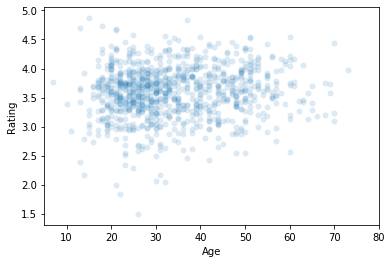

In [45]:
plt.scatter(users_and_ratings['age'], user_id_and_ratings['rating'], lw=0, alpha=.15)
plt.xlim([5,80])
plt.xlabel("Age")
plt.ylabel('Rating')

From the above we can see that there are more outliers, rating-wise, on the younger end of things. As people get older they seem to be less critical of the movies and simply rate them on average 2.5 or higher

Ratings below 2.5 and above 4.5 are also fairly uncommon. Especially considering we have 100000 entries in the ratings.